# Comparison of 1D Density Estimators

## Fig 6.5

In [1]:
"""
Comparison of 1D Density Estimators
-----------------------------------
Figure 6.5

A comparison of different density estimation methods for two simulated
one-dimensional data sets (cf. figure 5.21). The generating distribution is
same in both cases and shown as the dotted line; the samples include 500
(top panel) and 5000 (bottom panel) data points (illustrated by vertical bars
at the bottom of each panel). Density estimators are Bayesian blocks
(Section 5.7.2), KDE (Section 6.1.1) and the nearest-neighbor method (eq. 6.15).
"""

'\nComparison of 1D Density Estimators\n-----------------------------------\nFigure 6.5\n\nA comparison of different density estimation methods for two simulated\none-dimensional data sets (cf. figure 5.21). The generating distribution is\nsame in both cases and shown as the dotted line; the samples include 500\n(top panel) and 5000 (bottom panel) data points (illustrated by vertical bars\nat the bottom of each panel). Density estimators are Bayesian blocks\n(Section 5.7.2), KDE (Section 6.1.1) and the nearest-neighbor method (eq. 6.15).\n'

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

from sklearn.neighbors import KernelDensity

from astroML.density_estimation import KNeighborsDensity
from astropy.visualization import hist


In [3]:
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib.dates as mdates
from matplotlib import gridspec

In [4]:
N=10
jet = plt.get_cmap('jet')
cNorm = colors.Normalize(vmin=0, vmax=N)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
all_colors = scalarMap.to_rgba(np.arange(N), alpha=1)

In [5]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)


In [6]:
#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=18, usetex=True)

# Generate our data:

In [7]:
#------------------------------------------------------------
# Generate our data: a mix of several Cauchy distributions
#  this is the same data used in the Bayesian Blocks figure
np.random.seed(0)
N = 10000
mu_gamma_f = [(5, 1.0, 0.1),
              (7, 0.5, 0.5),
              (9, 0.1, 0.1),
              (12, 0.5, 0.2),
              (14, 1.0, 0.1)]

In [8]:
true_pdf = lambda x: sum([f * stats.cauchy(mu, gamma).pdf(x) for (mu, gamma, f) in mu_gamma_f])

In [9]:
x = np.concatenate([stats.cauchy(mu, gamma).rvs(int(f * N)) for (mu, gamma, f) in mu_gamma_f])

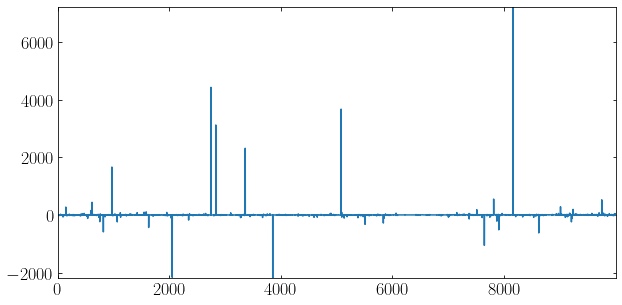

In [10]:
plt.plot(x)

In [11]:
np.random.shuffle(x)

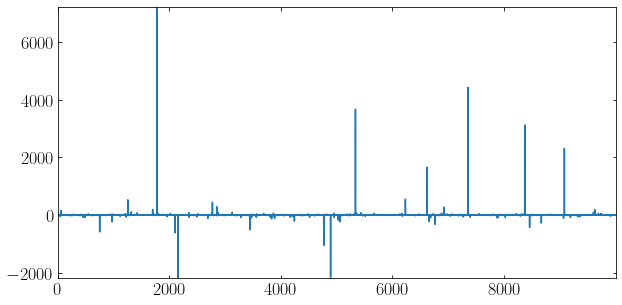

In [12]:
plt.plot(x)

In [13]:
x = x[x > -10]
x = x[x < 30]

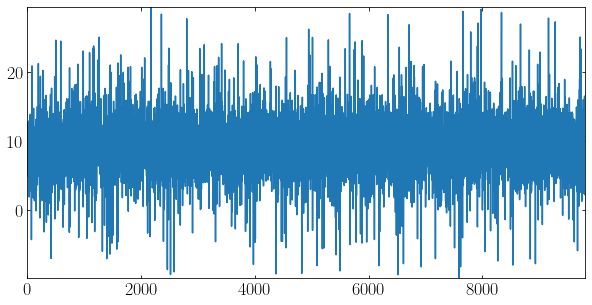

In [14]:
plt.plot(x)

# plot the results

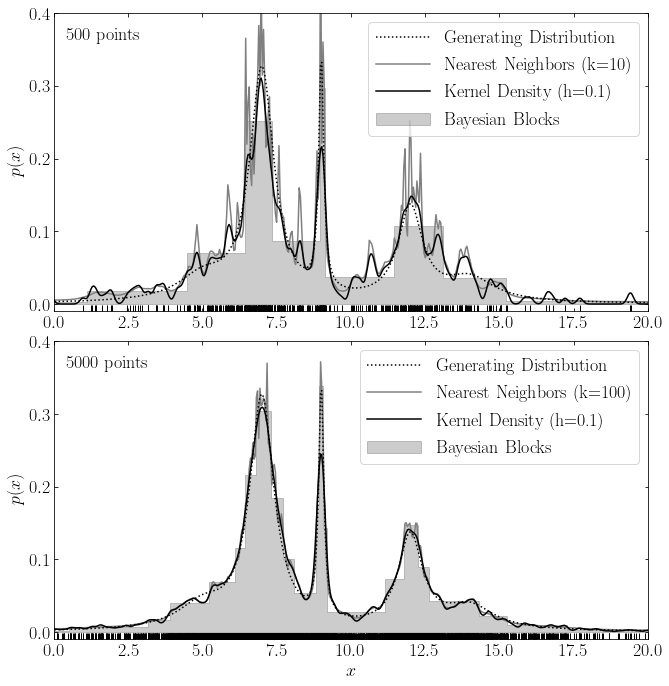

In [15]:

#------------------------------------------------------------
# plot the results
fig = plt.figure(figsize=(10, 10))
fig.subplots_adjust(bottom=0.08, top=0.95, right=0.95, hspace=0.1)
N_values = (500, 5000)
subplots = (211, 212)
k_values = (10, 100)

for N, k, subplot in zip(N_values, k_values, subplots):
    ax = fig.add_subplot(subplot)
    xN = x[:N]
    t = np.linspace(-10, 30, 1000)

    # Compute density with KDE
    kde = KernelDensity(bandwidth=0.1, kernel='gaussian')
    kde.fit(xN[:, None])
    dens_kde = np.exp(kde.score_samples(t[:, None]))

    # Compute density with Bayesian nearest neighbors
    nbrs = KNeighborsDensity('bayesian', n_neighbors=k).fit(xN[:, None])
    dens_nbrs = nbrs.eval(t[:, None]) / N

    # plot the results
    ax.plot(t, true_pdf(t), ':', color='black', zorder=3,
            label="Generating Distribution")
    ax.plot(xN, -0.005 * np.ones(len(xN)), '|k')
    hist(xN, bins='blocks', ax=ax, density=True, zorder=1,
         histtype='stepfilled', color='k', alpha=0.2,
         label="Bayesian Blocks")
    ax.plot(t, dens_nbrs, '-', lw=1.5, color='gray', zorder=2,
            label="Nearest Neighbors (k=%i)" % k)
    ax.plot(t, dens_kde, '-', color='black', zorder=3,
            label="Kernel Density (h=0.1)")

    # label the plot
    ax.text(0.02, 0.95, "%i points" % N, ha='left', va='top',transform=ax.transAxes)
    ax.set_ylabel('$p(x)$')
    ax.legend(loc='upper right')

    if subplot == 212:
        ax.set_xlabel('$x$')

    ax.set_xlim(0, 20)
    ax.set_ylim(-0.01, 0.4001)

plt.show()
